In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset into a DataFrame named 'df'
df = pd.read_csv("C:\\Users\\91887\\Desktop\\Indian_Kids_Screen_Time.csv")

# Display the first few rows of the dataset
print("Initial Data Head:")
print(df.head())

Initial Data Head:
   Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
3                     NaN          Urban  
4 

In [6]:
# To check Null Values
print("Checking Null Values:")
print(df.isnull().sum())

Checking Null Values:
Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [7]:
print("Duplicate value Rows:", df.duplicated().sum())
df = df.drop_duplicates()
print(df.shape)
df.describe()

Duplicate value Rows: 44
(9668, 8)


,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9668.000000,9668.000000,9668.000000
mean,12.992760,4.367780,0.427028
std,3.158931,1.703002,0.073185
min,8.000000,0.000000,0.300000
25%,10.000000,3.427500,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [8]:
# Display Statistical Measures
print("\nStatistical Measures:")
print(df.describe())


Statistical Measures:
               Age  Avg_Daily_Screen_Time_hr  \
count  9668.000000               9668.000000   
mean     12.992760                  4.367780   
std       3.158931                  1.703002   
min       8.000000                  0.000000   
25%      10.000000                  3.427500   
50%      13.000000                  4.440000   
75%      16.000000                  5.380000   
max      18.000000                 13.890000   

       Educational_to_Recreational_Ratio  
count                        9668.000000  
mean                            0.427028  
std                             0.073185  
min                             0.300000  
25%                             0.370000  
50%                             0.430000  
75%                             0.480000  
max                             0.600000  



Correlation of all numerical Columns:


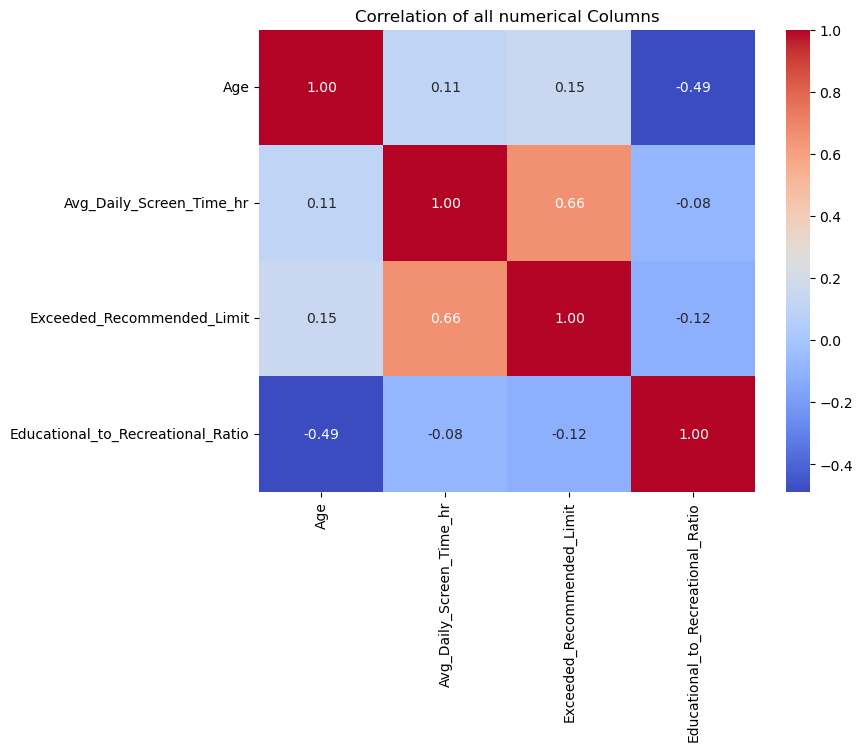

In [9]:
# Create a correlation matrix and visualize it with a heatmap
print("\nCorrelation of all numerical Columns:")
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of all numerical Columns')
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9668 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9668 non-null   int64  
 1   Gender                             9668 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9668 non-null   float64
 3   Primary_Device                     9668 non-null   object 
 4   Exceeded_Recommended_Limit         9668 non-null   bool   
 5   Educational_to_Recreational_Ratio  9668 non-null   float64
 6   Health_Impacts                     6488 non-null   object 
 7   Urban_or_Rural                     9668 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 613.7+ KB


In [13]:
df.dtypes

Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object

In [14]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
print("IQR:\n", IQR)

IQR:
 Age                                  6.0000
Avg_Daily_Screen_Time_hr             1.9525
Educational_to_Recreational_Ratio    0.1100
dtype: float64


In [11]:
'''### Observations from Initial Analysis:
* **Missing Values**: There are **3,218 missing values** in the `Health_Impacts` column, which need to be handled.
* **Duplicates**: The dataset contained **44 duplicate rows**, which have been removed.
* **Correlation**: There is a moderate positive correlation (0.66) between `Avg_Daily_Screen_Time_hr` and `Exceeded_Recommended_Limit`, which is expected.'''

'### Observations from Initial Analysis:\n* **Missing Values**: There are **3,218 missing values** in the `Health_Impacts` column, which need to be handled.\n* **Duplicates**: The dataset contained **44 duplicate rows**, which have been removed.\n* **Correlation**: There is a moderate positive correlation (0.66) between `Avg_Daily_Screen_Time_hr` and `Exceeded_Recommended_Limit`, which is expected.'